<a href="https://colab.research.google.com/github/AnshMittal1811/BasicCVprogs/blob/master/CountingLemons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install ipython-autotime
%load_ext autotime

In [3]:
cd 'drive/My Drive/Data/CountingLemons'

/content/drive/My Drive/Data/CountingLemons
time: 6.78 ms


In [4]:
ls

lemon1.jpg  lemon3.jpg      lemon6.jpg  lemons1.jpg
lemon2.jpg  lemon4-586.jpg  lemon7.jpg
time: 2.88 s


In [5]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
import imutils

time: 42.8 ms


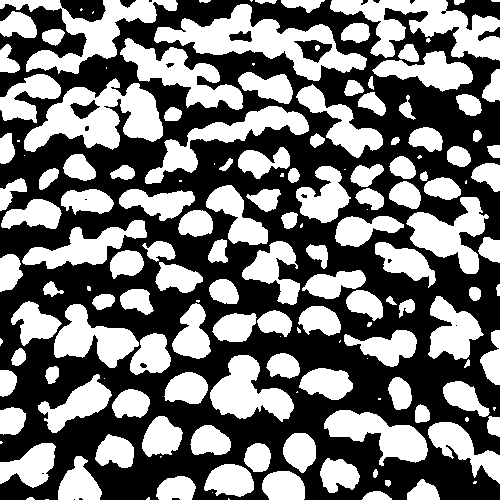

time: 60.2 ms


In [6]:
img = cv.imread('lemon2.jpg')

# Grayscaling the image
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

# Thresholding the Image (Otsu's thresholding after Gaussian filtering)
blur = cv.GaussianBlur(gray,(5,5),0)
_, thresh = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# To equally resize the images along their width
# thresh = imutils.resize(thresh, width=200)

# To display the thresholded images
cv2_imshow(thresh)

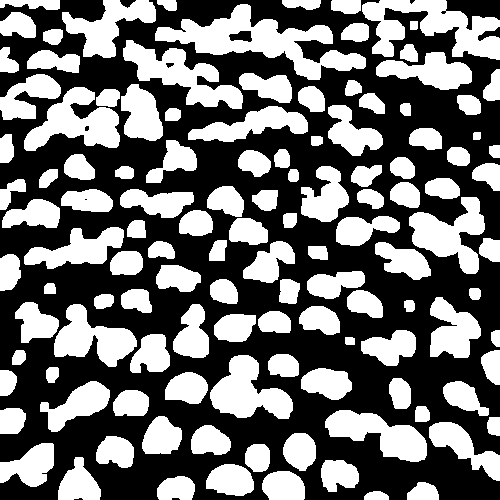

------------------------------------------------------------


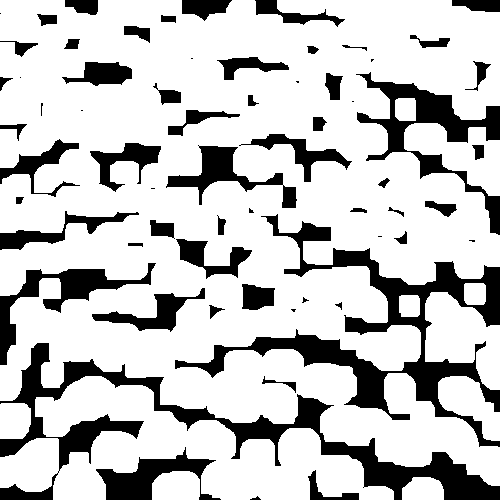

------------------------------------------------------------


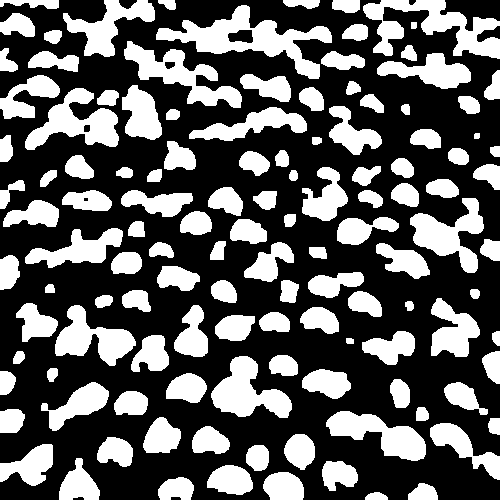

------------------------------------------------------------


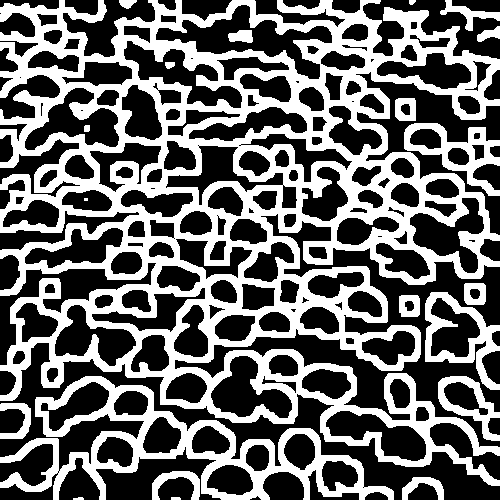

time: 89.1 ms


In [7]:
# noise removal by using Erosion
kernel = np.ones((3,3),np.uint8)
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 3)
cv2_imshow(opening)
print('-'* 60)

# sure background area after image has been eroded considerably
sure_bg = cv.dilate(opening, kernel,iterations=5)
cv2_imshow(sure_bg)
print('-'* 60)

# Finding sure foreground area to subtract it from the sure background area
dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
_, sure_fg = cv.threshold(dist_transform,0.1*dist_transform.max(),255,0)
cv2_imshow(sure_fg)
print('-'* 60)

# Finding the region which is (sure bg area - sure fg area)
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg,sure_fg)
cv2_imshow(unknown)

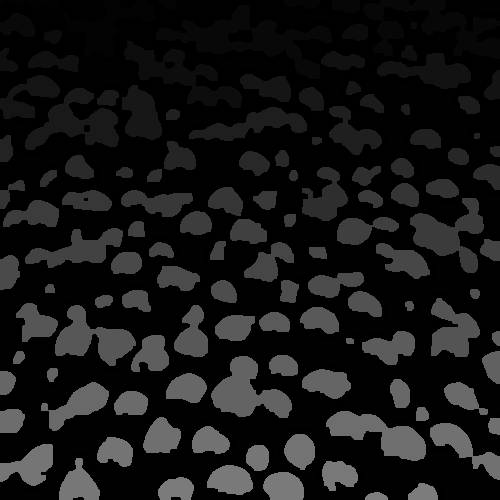

time: 26.5 ms


In [8]:
# Marker labelling using different intensities
_, markers = cv.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0
cv2_imshow(markers)

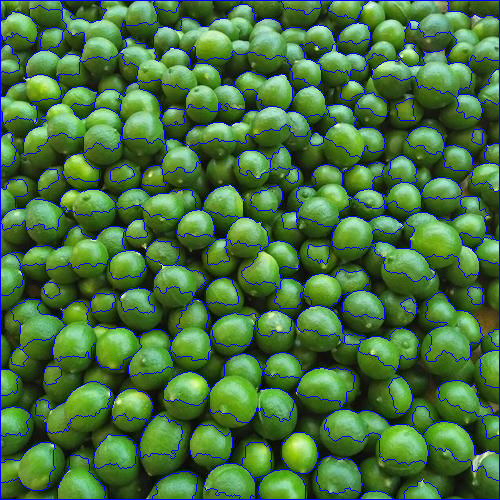

Total Lemons counted (using Watershed Algorithm):
125
time: 138 ms


In [9]:
# Using Watershed algorithm to differentiate between different lemons
markers = cv.watershed(img,markers)
# Displaying the segmented lemons in the image
img[markers == -1] = [255,0,0]

cv2_imshow(img)
print('Total Lemons counted (using Watershed Algorithm):')
print(markers.max())

----------

# Final Results: Calculating number of Lemons in all Images

In [10]:
import glob
images = glob.glob('*.jpg')

time: 2.62 ms


lemon6.jpg


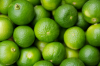

--------------------
lemon7.jpg


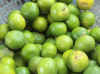

--------------------
lemons1.jpg


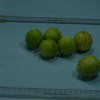

--------------------
lemon2.jpg


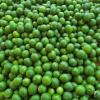

--------------------
lemon3.jpg


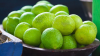

--------------------
lemon4-586.jpg


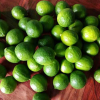

--------------------
lemon1.jpg


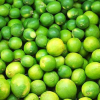

--------------------
time: 188 ms


In [11]:
for i in range(len(images)):
    img = cv.imread(images[i])
    img = imutils.resize(img, width=100)
    print(images[i])
    cv2_imshow(img)
    print('-'*20)

lemon6.jpg


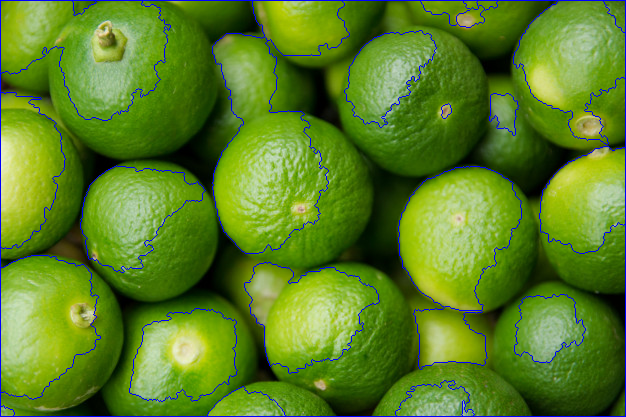

Total Lemons counted (using Watershed Algorithm):
26
--------------------------------------------------
lemon7.jpg


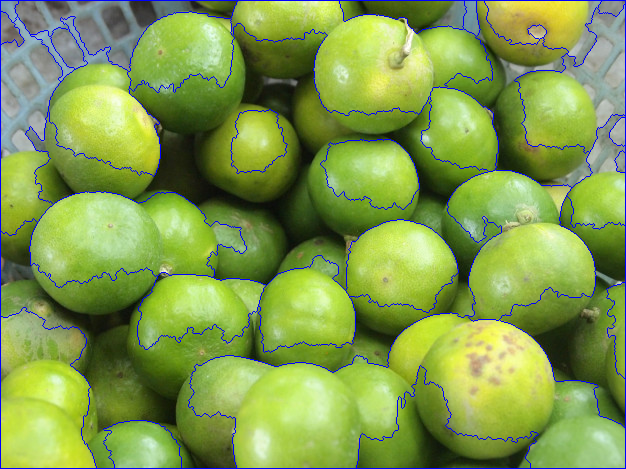

Total Lemons counted (using Watershed Algorithm):
28
--------------------------------------------------
lemons1.jpg


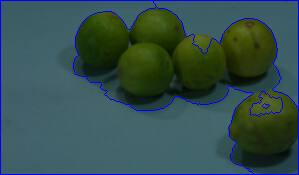

Total Lemons counted (using Watershed Algorithm):
5
--------------------------------------------------
lemon2.jpg


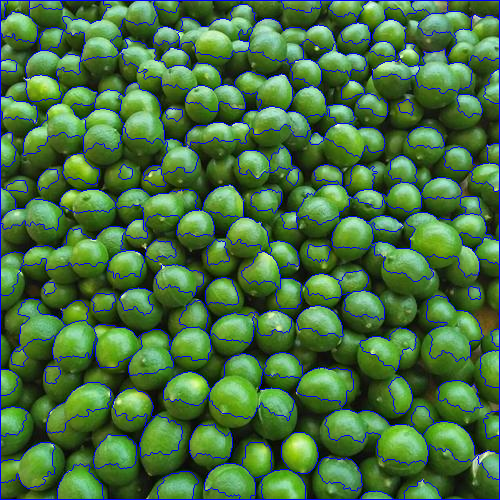

Total Lemons counted (using Watershed Algorithm):
147
--------------------------------------------------
lemon3.jpg


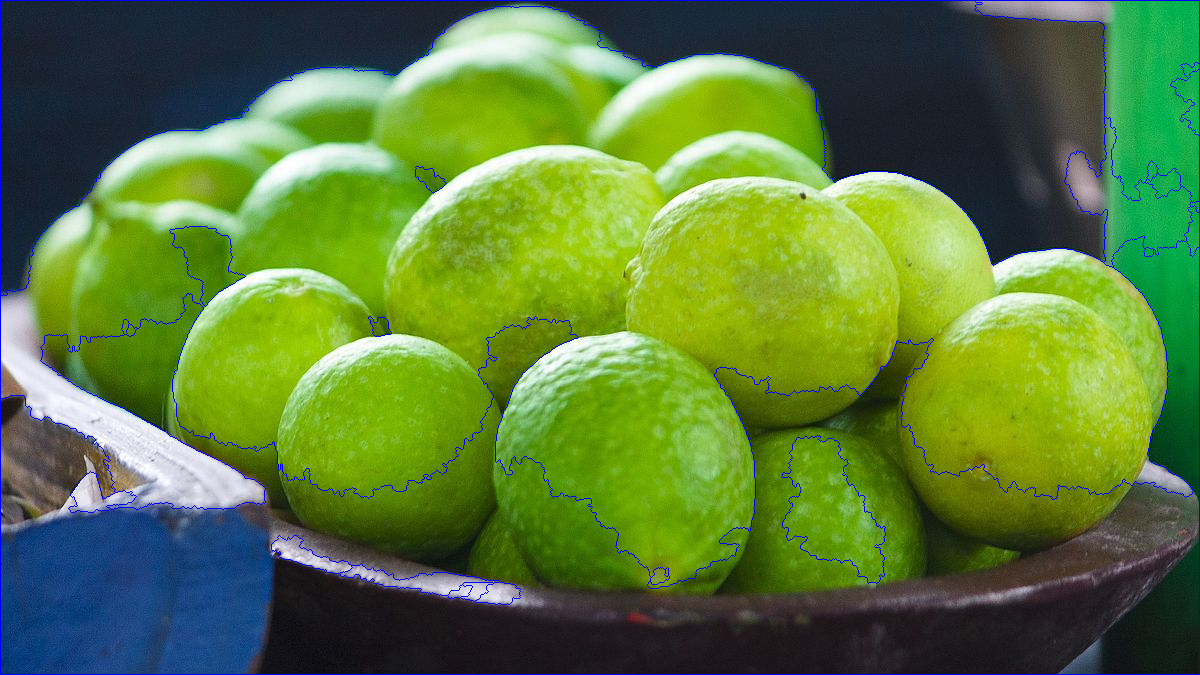

Total Lemons counted (using Watershed Algorithm):
21
--------------------------------------------------
lemon4-586.jpg


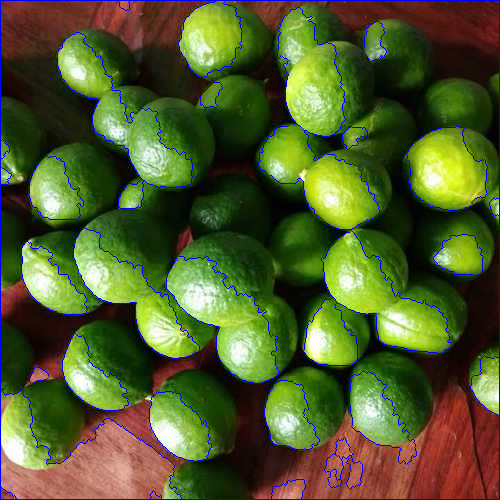

Total Lemons counted (using Watershed Algorithm):
33
--------------------------------------------------
lemon1.jpg


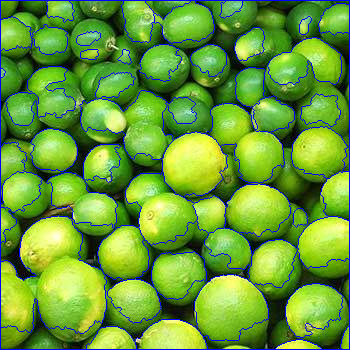

Total Lemons counted (using Watershed Algorithm):
52
--------------------------------------------------
time: 1.8 s


In [12]:
for i in range(len(images)):
  img = cv.imread(images[i])

  # This is done to perform Semantic segmentation  which could have otherwise be done by DeepLab V3 or other Other Deep Learning Algorithms
  if images[i] == 'lemons1.jpg':

    img = img[:][75:250]

    # Grayscaling the image
    gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

    # Thresholding the Image (Otsu's thresholding after Gaussian filtering)
    blur = cv.GaussianBlur(gray,(3,3),0)
    _, thresh = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
  
  else:
    # Grayscaling the image
    gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

    # Thresholding the Image (Otsu's thresholding without Gaussian filtering)
    _, thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)


  # noise removal by using Erosion
  kernel = np.ones((3,3),np.uint8)
  opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 4)

  # sure background area after image has been eroded considerably
  sure_bg = cv.dilate(opening, kernel,iterations=5)

  # Finding sure foreground area to subtract it from the sure background area
  dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
  _, sure_fg = cv.threshold(dist_transform,0.1*dist_transform.max(),255,0)

  # Finding the region which is (sure bg area - sure fg area)
  sure_fg = np.uint8(sure_fg)
  unknown = cv.subtract(sure_bg,sure_fg)

  # Marker labelling using different intensities
  _, markers = cv.connectedComponents(sure_fg)

  # Add one to all labels so that sure background is not 0, but 1
  markers = markers+1

  # Now, mark the region of unknown with zero
  markers[unknown==255] = 0

  print(images[i])
  
  # Using Watershed algorithm to differentiate between different lemons
  markers = cv.watershed(img,markers)

  # Displaying the segmented lemons in the image
  img[markers == -1] = [255,0,0]

  cv2_imshow(img)
  print('Total Lemons counted (using Watershed Algorithm):')

  # We use max to get the maximum number of segmented regions which depict the number of lemons in the images
  print(markers.max())
  print('-'*50)

--------------